In [1]:
import csv
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy

# FPGA data
data = pd.read_csv('QPix_readout.csv')
ts = data.iloc[1:,0]

# Convert to int list
ts_list = []
for i in range(1,len(ts)+1):
    ts_list.append(int(ts[i]))

# Generate x-axis (for plotting) over whole timestamp range
x_axis = list(range(ts_list[0], ts_list[len(ts_list)-1]))

# Map collected timestampt to 1's on the y-axis
y_axis = []
for time in range(0, len(x_axis)):
    if x_axis[time] == ts_list[0]:
        y_axis.append(1)
        ts_list.pop(0)
    else:
        y_axis.append(0)

In [2]:
# Scope data
data = pd.read_csv('tek0005ALL.csv', skiprows = 20)
time = data.iloc[1:,0]
lvds0 = data.iloc[1:,1]
deltaT = data.iloc[1:,3]

y_axis2 = []
x_axis2 = []
for i in range(1, len(time)):
    if deltaT[i] > 1:
        x_axis2.append(time[i])
        if lvds0[i] > 1:
            y_axis2.append(1)
        else:
            y_axis2.append(0)

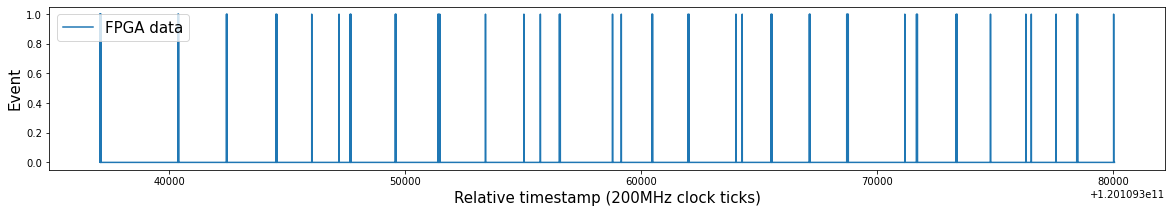

In [3]:
plt.figure(figsize=(20,3))
plt.plot(x_axis, y_axis, label="FPGA data")
plt.xlabel("Relative timestamp (200MHz clock ticks)", fontsize=15)
plt.ylabel("Event", fontsize=15)
plt.legend(loc="upper left", fontsize=15)

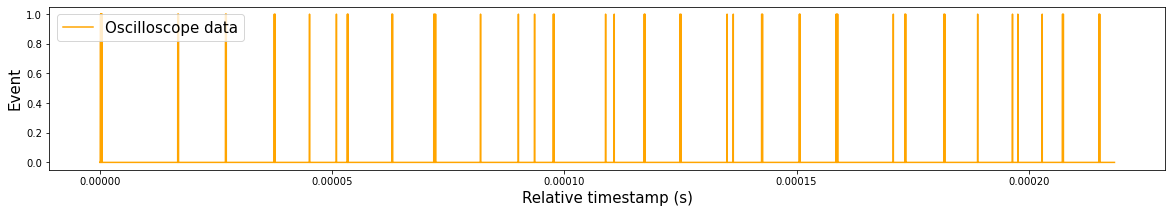

In [4]:
plt.figure(figsize=(20,3))
plt.plot(x_axis2, y_axis2, label="Oscilloscope data", color="orange")
plt.xlabel("Relative timestamp (s)", fontsize=15)
plt.ylabel("Event", fontsize=15)
plt.legend(loc="upper left", fontsize=15)

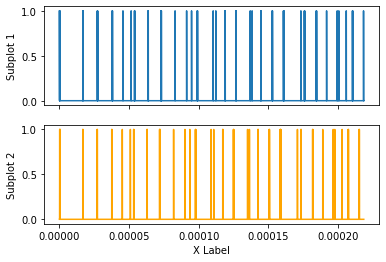

In [6]:
#plt.figure(figsize=(20,3))
x_fake = np.linspace(0, x_axis2[len(x_axis2)-1], num=len(x_axis))

# NOTE: scope data goes all the way to end of deltaT, 
# so FPGA timestamp data is in a smaller "window",
# and appears "stretched"

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
# Plot on first subplot
ax1.plot(x_fake, y_axis)
ax1.set_ylabel('Subplot 1')
# Plot on second subplot
ax2.plot(x_axis2, y_axis2, color="orange")
ax2.set_ylabel('Subplot 2')
# Set x-axis label for bottom subplot only
ax2.set_xlabel('X Label')
plt.show()